### Exercise 5.20: A more advanced adaptive method for the trapezoidal rule

In Section 5.3 we studied an adaptive version of the trapezoidal
rule in which the number of steps is increased -and the width $h$ of the
slices correspondingly decreased - until the calculation gives a value for
the integral accurate to some desired level.  Although this method
varies $h$, it still calculates the integral at any individual stage of the
process using slices of equal width throughout the domain of integration.
In this exercise we look at a more sophisticated form of the trapezoidal
rule that uses different step sizes in different parts of the domain, which
can be useful particularly for poorly behaved functions that vary rapidly
in certain regions but not others.  Remarkably, this method is not much
more complicated to program than the ones we've already seen, if one knows
the right tricks.  Here's how the method works.

Suppose we wish to evaluate the integral $I = \int_a^b f(x) dx$ and we want an error of no more than $\epsilon$ on our answer.  To put that another way, if we divide up the integral into slices of width~$h$ then we require an accuracy per slice of

$ h\,{\epsilon\over b-a} = h\delta$,

where $\delta = \epsilon/(b-a)$ is the target accuracy per unit interval.

We start by evaluating the integral using the trapezoidal rule with just a
single slice of width $h_1=b-a$.  Let us call the estimate of the integral
from this calculation $I_1$.  Usually $I_1$ will not be very accurate, but
let us ignore that for the moment.  Next we make a second estimate $I_2$ of
the integral, again using the trapezoidal rule but now with two slices of
width $h_2=\frac{1}{2} h_1$ each.  Equation (5.28) tells us that the error on
this second estimate is $\frac{1}{3}(I_2-I_1)$ to leading order.  If this error
is smaller than the desired accuracy $h_2\delta$ then our calculation is
complete and we need go no further.  $I_2$ is a good enough estimate of the
integral.

Most likely, however, this will not be the case; the accuracy will not be
good enough.  If so, then we divide the integration interval into two equal
parts of size $\frac{1}{2} (b-a)$ each, and we repeat the process above in each
part separately, calculating estimates $I_1$ and $I_2$ using one and two
slices respectively, estimating the error, and checking to see if it is
less than $h_2\delta$ (with the new value of $h_2$ now).

We keep on repeating this process, dividing each slice in half and in half
again, as many times as necessary to achieve the desired accuracy in every
slice.  Different slices may be divided different numbers of times, and
hence we may end up with different sized slices in different parts of the
integration domain.  The method automatically uses whatever size and number
of slices is appropriate in each region.

1.Write a program using this method to calculate the integral

$I = \int_0^{10} {\sin^2 x\over x^2} dx$,

to an accuracy of $\epsilon=10^{-4}$. Start by writing a function to
calculate the integrand $f(x) = (\sin^2 x)/x^2$.  Note that the limiting
value of the integrand at $x=0$ is 1. You'll probably have to include this
point as a special case in your function using an if statement.

The best way to perform the integration itself is to make use of the
technique of recursion, the ability of a Python function to call itself.
(If you're not familiar with recursion, you may like to look at
Exercise 2.13 on page 83 before doing this exercise.)  Write a function
**step(x1,x2,f1,f2)** that takes as arguments the beginning and end
points $x_1,x_2$ of a slice and the values $f(x_1), f(x_2)$ of the
integrand at those two points, and returns the value of the integral from
$x_1$ to $x_2$.  This function should evaluate the two estimates $I_1$
and $I_2$ of the integral from $x_1$ to $x_2$, calculated with one and two
slices respectively, and the error $\frac{1}{3}(I_2-I_1)$.  If this error meets
the target value, which is $\frac{1}{2}(x_2-x_1)\delta$, then the calculation is
complete and the function simply returns the value $I_2$.  If the error
fails to meet the target, then the function calls itself, twice, to
evaluate the integral separately on the first and second halves of the
interval and returns the sum of the two results.  (And then *those*
functions can call themselves, and so forth, subdividing the integral as
many times as necessary to reach the required accuracy.)

**Hint:** As icing on the cake, when the error target is met and the function
returns a value for the integral in the current slice, it can, in fact,
return a slightly better value than the estimate $I_2$.  Since you will
already have calculated the value of the integrand $f(x)$ at $x_1$, $x_2$,
and the midpoint $x_m=\frac{1}{2}(x_1+x_2)$ in order to evaluate $I_2$, you can
use those results to compute the improved Simpson's rule estimate,
Eq. (5.7), for this slice.  You just return the value $\frac{1}{6}
h[f(x_1)+4f(x_m)+f(x_2)]$ instead of the trapezoidal rule estimate $\frac{1}{4}
h[f(x_1)+2f(x_m)+f(x_2)]$ (where $h=x_2-x_1$).  This involves very little
extra work, but gives a value that is more accurate by two orders in $h$.
(Technically, this is an example of the method of "local extrapolation",
although it's perhaps not obvious what we're extrapolating in this case.
We'll discuss local extrapolation again when we study adaptive methods for
the solution of differential equations in Section 8.4.)

2.Why does the function **step(x1,x2,f1,f2)** take not only the positions $x_1$ and $x_2$ as arguments, but also the values $f(x_1)$ and $f(x_2)$?  Since we know the function $f(x)$, we could just calculate these values from $x_1$ and $x_2$.  Nonetheless, it is a smart move include the values of $f(x_1)$ and $f(x_2)$ as arguments to the function. Why?

3.Modify your program to make a plot of the integrand with dots added showing where the ends of each integration slice lie.  You should see larger slices in portions of the integrand that follow reasonably straight lines (because the trapezoidal rule gives an accurate value for straight-line integrands) and smaller slices in portions with more curvature.



1.51864249562
1.5186458041341095


C:\Users\falkz\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


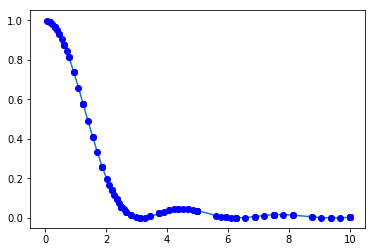

In [38]:
from __future__ import division
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # Check your work

def trap(f, a, b, n):
    x = np.linspace(a,b,n) # Observe that N points here makes N - 1 trapezoids. 
    h = (b-a) / (n-1)   # Never forget the '5-fingers theorem'
    fx = f(x)           # Evaluate all the function values at one time. Faster.
    
    fa, fb = fx[0], fx[-1]
    integral = (fa + fb) / 2
    integral += sum(fx[1:-1])
    integral *= h
    return integral          # Use formula to compute solution

f = lambda x: 1 if x == 0 else (np.sin(x)**2)/(x**2)

#same as f but for x being an np.array
g = lambda x: 1 if x.any() == 0 else (np.sin(x)**2)/(x**2)

tolerance = 1.0e-5
bs = []

def step(a,b,f1,f2):
    mid = a + (float(b - a) / 2)
#     I1 = trap(f, a, b, 2)
#     I2 = trap(f, a, b, 3)
    #couldn't get my trap to work, issues between np.array and 
    #sean shared these manual integrals with me
    I1 = (1.0/4.0) * float(b-a) * (f1 + (2 * f(mid)) + f2)
    I2 = (1.0/6.0) * float(b-a) * (f1 + (4 * f(mid)) + f2)
    bs.append(b)
    error = 1.0/3.0 * abs(I2 - I1)
    if error > tolerance:#1.0e-4
        return step(a, mid, f(a), f(mid)) + step(mid, b, f(mid), f(b))
    return I2

print(step(0,10,f(0), f(10)))
print(quad(f,0,10)[0])   # Check on your value

xs = np.linspace(0,10,1000)
vals = g(np.array(bs))

#looks similer to yours, kinda hackish and not totally there i think..

plt.plot(xs, g(xs))
plt.plot(bs, vals, 'bo', label = 'Data Points')
plt.show()

### Exercise 5.23 Image processing and the STM

When light strikes a surface, the amount falling per unit area
depends not only on the intensity of the light, but also on the angle of
incidence.  If the light makes an angle $\theta$ to the normal, it only
"sees" $\cos\theta$ of area per unit of actual area on the surface:

So the intensity of illumination is $a\cos\theta$, if $a$ is the raw
intensity of the light.  This simple physical law is a central element of
3D computer graphics.  It allows us to calculate how light falls on
three-dimensional objects and hence how they will look when illuminated
from various angles.

Suppose, for instance, that we are looking down on the Earth from above and
we see mountains.  We know the height of the mountains $w(x,y)$ as a
function of position in the plane, so the equation for the Earth's
surface is simply $z=w(x,y)$, or equivalently $w(x,y)-z=0$, and the normal
vector $\vec{v}$ to the surface is given by the gradient of $w(x,y)-z$
thus:

$
\vec{v} =
\nabla [w(x,y)-z] = \begin{pmatrix}
                  \partial/\partial x \\
                  \partial/\partial y \\
                  \partial/\partial z
                \end{pmatrix}
                [w(x,y)-z]
              = \begin{pmatrix}
                  \partial w/\partial x \\
                  \partial w/\partial y \\
                  -1
                \end{pmatrix}.
$

Now suppose we have light coming in represented by a vector $\vec{a}$ with
magnitude equal to the intensity of the light.  Then the dot product of the
vectors $\vec{a}$ and $\vec{v}$ is

$\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta,$

where $\theta$ is the angle between the vectors.  Thus the intensity of
illumination of the surface of the mountains is

$
I = |\vec{a}| \cos\theta = {\vec{a}\cdot\vec{v}\over|\vec{v}|}
  = {a_x (\partial w/\partial x)
   + a_y (\partial w/\partial y) - a_z\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$

Let's take a simple case where the light is shining horizontally with unit
intensity, along a line an angle~$\phi$ counter-clockwise from the
east-west axis, so that $\vec{a}=(\cos\phi,\sin\phi,0)$.  Then our
intensity of illumination simplifies to
$
I = {\cos\phi\,(\partial w/\partial x) + \sin\phi\,(\partial w/\partial y)\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$
If we can calculate the derivatives of the height $w(x,y)$ and we
know $\phi$ we can calculate the intensity at any point.

1. In the on-line resources you'll find a file called
 ** altitude.txt **, which contains the altitude $w(x,y)$ in meters above
  sea level (or depth below sea level) of the surface of the Earth,
  measured on a grid of points $(x,y)$.  Write a program that reads this
  file and stores the data in an array.  Then calculate the derivatives
  $\partial w/\partial x$ and $\partial w/\partial y$ at each grid point.
  Explain what method you used to calculate them and why.  (Hint: You'll
  probably have to use more than one method to get every grid point,
  because awkward things happen at the edges of the grid.)  To calculate
  the derivatives you'll need to know the value of $h$, the distance in
  meters between grid points, which is about $30\,000\,$m in this case.
  (It's actually not precisely constant because we are representing the
  spherical Earth on a flat map, but $h=30\,000\,$m will give reasonable
  results.)
2. Now, using your values for the derivatives, calculate the intensity
  for each grid point, with $\phi=45^\circ$, and make a density plot of the
  resulting values in which the brightness of each dot depends on the
  corresponding intensity value.  If you get it working right, the plot
  should look like a relief map of the world---you should be able to see
  the continents and mountain ranges in 3D.  (Common problems include a map
  that is upside-down or sideways, or a relief map that is "inside-out",
  meaning the high regions look low and *vice versa*.  Work with the
  details of your program until you get a map that looks right to you.)
3. There is another file in the on-line resources called **stm.txt**,
  which contains a grid of values from scanning tunneling microscope
  measurements of the (111) surface of silicon.  A scanning
  tunneling microscope (STM) is a device that measures the shape of
  surfaces at the atomic level by tracking a sharp tip over the surface and
  measuring quantum tunneling current as a function of position.  The end
  result is a grid of values that represent the height of the surface as a
  function of position and the data in the file **stm.txt** contain just
  such a grid of values.  Modify the program you just wrote to visualize
  the STM data and hence create a 3D picture of what the silicon
  surface looks like.  The value of $h$ for the derivatives in this case is
  around $h=2.5$ (in arbitrary units).


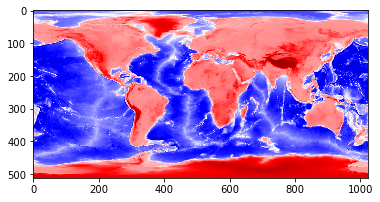

In [43]:
# First plot the entire image.

data = np.genfromtxt("altitude.txt", dtype='f', delimiter=' ')[: :]
plt.imshow(data, cmap='seismic')

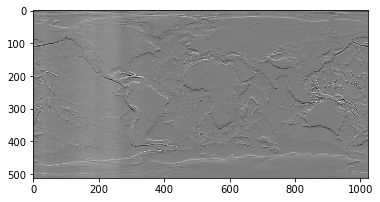

In [50]:
# Now compute the gradients and determine the intensity based on the formula.

# Note that no explicit loops are allowed in the gradient calculations.
# HINT: Finding the central differences for a one-dimensional numpy array f would be:
dx = 30000
dy = 30000
decToRad = np.pi/180
a = 45


dfdx = np.zeros(data.shape)
dfdy = np.zeros(data.shape)
dfdx[1:-1] = (data[:-2] - data[2:]) / (2 * dx)
dfdy[1:-1:] = (data[2:,:] - data[:-2,:]) / (2 * dy)
# Now do forward or backward differences to find the ends...

dfdx[0:] = (data[1:2] - data[0:1]) / (2 * dx)#weird white shadow coming from left over NA.... something wrong here
dfdx[len(dfdx) - 1:] = (data[len(data) - 1:] - data[ (len(data) - 2) : (len(data) - 1) ]) / (2 * dx)

dfdy[0:1,:] = (data[1:2,:] - data[0:1,:]) / (2 * dy)
dfdy[len(dfdy) - 1:,:] = (data[len(dfdy) - 1:,:] - data[( len(dfdy) - 2) : (len(dfdy) - 1) ]) / (2 * dy)

I = ((np.cos( a * decToRad ) * dfdx) + (np.sin( a * decToRad ) * dfdy)) / np.sqrt( (dfdx**2) + (dfdy**2) + 1)

plt.imshow(I, cmap='gray')



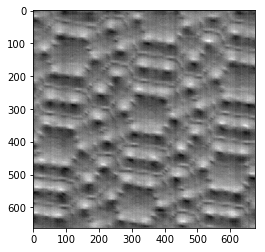

In [60]:
# Trivial application of the machinery developed above.
data = np.genfromtxt("stm.txt", dtype='f', delimiter=' ')[: :]


dx = 30000
dy = 30000
decToRad = np.pi/180
a = 45


dfdx = np.zeros(data.shape)
dfdy = np.zeros(data.shape)
dfdx[1:-1] = (data[:-2] - data[2:]) / (2 * dx)
dfdy[1:-1:] = (data[2:,:] - data[:-2,:]) / (2 * dy)
# Now do forward or backward differences to find the ends...

dfdx[0:] = (data[1:2] - data[0:1]) / (2 * dx)#same issue seems to occur here
dfdx[len(dfdx) - 1:] = (data[len(data) - 1:] - data[ (len(data) - 2) : (len(data) - 1) ]) / (2 * dx)

dfdy[0:1,:] = (data[1:2,:] - data[0:1,:]) / (2 * dy)
dfdy[len(dfdy) - 1:,:] = (data[len(dfdy) - 1:,:] - data[( len(dfdy) - 2) : (len(dfdy) - 1) ]) / (2 * dy)

I = ((np.cos( a * decToRad ) * dfdx) + (np.sin( a * decToRad ) * dfdy)) / np.sqrt( (dfdx**2) + (dfdy**2) + 1)

plt.imshow(I, cmap='gray')